<a href="https://colab.research.google.com/github/CECILIACFR/DATASCIENCE/blob/main/MVP_CD_Hoteis_de_Esqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise e Boas Práticas

## Profs. Tatiana Escovedo e Hugo Villamizar

### Aluna: Cecília Correa Ferrari Rey 

### MVP Hotéis de Esqui na Europa (Data: abril/2023)





##1.Definição do Problema













O dataset usado neste projeto será o **Skiing Hotels**, proveniente da plataforma Kaggle, sobre Hotéis em resorts de Esqui em toda a Europa, contendo detalhes sobre os resorts onde estão localizados, como preço (em libras esterlinas) por pessoa por semana, número de elevadores no resort, distância total da pista e neve registrada em 2020 em cada resort.  Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/jacklacey/skiing-hotels.

Este Notebook de Análise Eploratória de um arquivo CSV, serve para checar a exsitência de valores faltantes, entender a distribuição de dados, verificar as relações entre os dados.  Através de visualizações tiraremos conclusões sobre quais são os dados mais relevantes e quais talvez precisemos manter fora de nossos modelos. Também investigamos um modelo de linha de base muito simples.

**Qual é a descrição do problema?** Identificar comportamento de preços e quantidade de pistas de esqui por dificuldade em países na Europa que contém Resorts/Hotéis de Esqui.

**Problema de aprendizado supervisionado ou não supervisionado?** Não supervisionado.

**Premissas ou hipóteses você tem sobre o problema?** "ESQUIAR NA EUROPA DE ACORDO COM O MAIS DESEJÁVEL". 

**Restrições ou condições foram impostas para selecionar os dados?** Os dados do dataset são de 6 meses atrás, e a neve registrada 2020 em cada resort é de 2020.

**Informações sobre os atributos:**

1. **index**: Uma coluna de índice.
2. **country**: O país onde o hotel está localizado.
3. **resort**: O resort onde o hotel está localizado.
4. **hotel**: O nome do hotel.
5. **price**: O preço (em libras esterlinas) por pessoa por semana. 
6. **distance_lift**: A distância do hotel ao teleférico mais próximo, em metros.
7. **altitude**:  A altitude do hotel, em metros.
8. **totalPiste**: O toal de Pistas em Km
9. **totalLifts**: O total de elevadores (teleféricos) no resort.
10.  **gondolas**: O total de gôndolas no resort.
11. **chairlLifts**: O total de cadeiras no resort.
12. **dragLlifts**: O total de dragLifts no resort.
13. **blues**: O total de pistas azuis - dificuldade baixa.
14. **reds**: O total de pistas vermelhas - dificuldade média.
15. **blacks**: O total de pistas pretas - dificuldade alta.
16. **totalRuns**: A distância total da pista em Km.
17. **link**: O link do Hotél de Esqui.
18. **sleeps**: O número de pessoas que podem dormir no Hotel de Esqui.
19. **decSnowLow2020**: A quantidade de neve nas encontas mais baixas em dezembro de 2020 em cm.
20. **decSnowHigh2020**: A quantidade de neve nas encontas mais altas em dezembro de 2020 em cm.
21. **janSnowLow2020**: A quantidade de neve nas encontas mais baixas em janeiro de 2020 em cm.
22. **janSnowHigh2020**: A quantidade de neve nas encontas mais altas em janeiro de 2020 em cm.
23. **febSnowLow2020**: A quantidade de neve nas encontas mais baixas em fevereiro de 2020 em cm.
24. **febSnowHigh2020**: A quantidade de neve nas encontas mais altas em fevereiro de 2020 em cm.










In [113]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import gc
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

##2.Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset caregado, irei explrá-lo um pouco.


In [115]:
# Carrega arquivo csv usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/CECILIACFR/DATASCIENCE/main/ski_hotels.csv"

# Informa o cabeçalho das colunas
colunas = ['index','country', 'resort', 'hotel', 'price', 'distance_lift', 'altitude', 'totalPiste', 'totalLifts', 'gondolas', 'chairlifts', 'draglifts', 'blues', 'reds', 'blacks', 'totalRuns', 'link', 'sleeps', 'decSnowLow2020', 'decSnowHigh2020', 'janSnowLow2020', 'janSnowHigh2020', 'febSnowLow2020', 'febSnowHigh2020']

# Lê o arquivo utilizando as colunas informadas]
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Verificando que dataset é um dataframe
type(dataset)   


pandas.core.frame.DataFrame

In [116]:
# Verficando as primeiras linhas do dataset
print(dataset.shape)


(407, 24)


In [117]:
# Verficando as primeiras linhas do dataset
dataset.head()

,index,country,resort,hotel,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,...,blacks,totalRuns,link,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77


Ao analisar as cinco primeiras linhas do dataset, é possível perceber que existem valores faltantes ("**unknown**"), como nas colunas "**distance_lift**" e "**sleeps**", e ainda verifica-se que os dados da primeira coluna denominada "**index**" ("ÍNDICE"), e da coluna "**link**" têm conteúdo que não serão necessários.

In [118]:
# Exclue 2 colunas do dataset
dataset = dataset.drop(columns=['index', 'link'])

In [119]:
# Verficando novamente as primeiras linhas do dataset
dataset.head()

,country,resort,hotel,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,chairlifts,...,reds,blacks,totalRuns,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,9,...,24.0,1.0,42.0,unknown,70,170,60,200,47,177
1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,9,...,24.0,1.0,42.0,unknown,70,170,60,200,47,177
2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,7,...,8.0,1.0,14.0,140,0,70,5,75,5,77
3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,4,...,13.0,1.0,15.0,590,0,0,160,200,194,246
4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,7,...,8.0,1.0,14.0,386,0,70,5,75,5,77


Ao exibir novamente as cinco primeiras linhas do dataset, verifica-se que foram excluídas com sucesso as colunas "**index**" e "**link**".

In [120]:
dataset.head().style.background_gradient(cmap = "Purples")

,country,resort,hotel,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,9,14,17.000000,24.000000,1.000000,42.000000,unknown,70,170,60,200,47,177
1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,9,14,17.000000,24.000000,1.000000,42.000000,unknown,70,170,60,200,47,177
2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,7,16,5.000000,8.000000,1.000000,14.000000,140,0,70,5,75,5,77
3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,4,13,1.000000,13.000000,1.000000,15.000000,590,0,0,160,200,194,246
4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,7,16,5.000000,8.000000,1.000000,14.000000,386,0,70,5,75,5,77


As primeiras cinco linhas do dataset exibidas acima demonstram as seguintes **informações quantitativas** mais relevantes, a saber:

*   o **preço** (coluna "**price**") dos hotéis são de valores bem próximos, em torno de 500 libras esterlinas;
*   na coluna **"altitude"** veriica-se que a altitude de 3 hotéis é em torno de 1.300m;
*   o **total de teleféricos** (coluna "**totalLifts**") é quase a mesma nos 5 hotéis exibidos;
*   o **total do gôndolas** (coluna "**gondolas**") é pequeno para cada hotel, sendo que nesta análise 2 hotéis não possuem gôndolas e 3 possuem uma única gôndola;
*   o **total de pistas blacks** (coluna "**blacks**") é 1 para cada um dos 5 hotéis exibidos.  

##3.Análise de Dados

###3.1.Estatístcias Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [121]:
# Mostra as dimensões do dataset
print(dataset.shape)

(407, 22)


O dataset possui e 407 instâncias (linhas) e 22 atributos (colunas).



In [122]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          407 non-null    object 
 1   resort           407 non-null    object 
 2   hotel            407 non-null    object 
 3   price            407 non-null    int64  
 4   distance_lift    407 non-null    object 
 5   altitude         407 non-null    int64  
 6   totalPiste       407 non-null    int64  
 7   totalLifts       407 non-null    int64  
 8   gondolas         407 non-null    int64  
 9   chairlifts       407 non-null    int64  
 10  draglifts        407 non-null    int64  
 11  blues            407 non-null    float64
 12  reds             407 non-null    float64
 13  blacks           407 non-null    float64
 14  totalRuns        407 non-null    float64
 15  sleeps           407 non-null    object 
 16  decSnowLow2020   407 non-null    object 
 17  decSnowHigh2020 

O resumo acima informa os **valores não nulos** encontrados no dataset. (407 instâncias sem valores faltantes para todas as 23 colunas), e o tipo (**Dtype**) de cada colunna.

In [123]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

country             object
resort              object
hotel               object
price                int64
distance_lift       object
altitude             int64
totalPiste           int64
totalLifts           int64
gondolas             int64
chairlifts           int64
draglifts            int64
blues              float64
reds               float64
blacks             float64
totalRuns          float64
sleeps              object
decSnowLow2020      object
decSnowHigh2020     object
janSnowLow2020      object
janSnowHigh2020     object
febSnowLow2020      object
febSnowHigh2020     object
dtype: object

Os tipos de dados (**Dtypes**) de cada atributo do dataset sob análise estão listados no resumo acima.

In [124]:
# Faz resumo estatístico do dataset
dataset.describe()

,price,altitude,totalPiste,totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,1095.027027,1358.781327,220.270270,60.395577,9.108108,24.766585,25.189189,41.115479,45.685504,14.007371,100.808354
std,342.841268,508.322847,164.592139,39.025295,8.398517,16.968010,19.300095,40.742178,38.777112,12.131969,81.835216
min,550.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,839.000000,900.000000,110.000000,30.000000,3.000000,12.000000,12.000000,16.000000,18.000000,4.000000,40.000000
50%,1021.000000,1441.000000,185.000000,55.000000,8.000000,22.000000,21.000000,30.000000,37.000000,9.000000,74.000000
75%,1270.500000,1800.000000,282.000000,82.000000,11.000000,35.000000,32.000000,46.000000,60.000000,22.000000,133.000000
max,2517.000000,2300.000000,1220.000000,206.000000,43.000000,83.000000,114.000000,186.000000,219.000000,51.000000,328.000000


Acima foi exibido resumo estatístico das variáveis numéricas do dataset. É possível perceber que os valores mínimos das colunas ("**totalPiste**", "**totalLifts**", "**gondolas**", "**chairLifts**", "**dragLists**", "**blues**", "**reds**", "**blacks**" e "**totalRuns**") possuem o valor "0", que pode significar valor desconhecido ou não informado.**negrito**

In [125]:
# Faz novo resumo estatístico do dataset com o recurso da cor "Purples"
dataset.describe().T.style.background_gradient(cmap = "Purples")

,count,mean,std,min,25%,50%,75%,max
price,407.000000,1095.027027,342.841268,550.000000,839.000000,1021.000000,1270.500000,2517.000000
altitude,407.000000,1358.781327,508.322847,180.000000,900.000000,1441.000000,1800.000000,2300.000000
totalPiste,407.000000,220.270270,164.592139,0.000000,110.000000,185.000000,282.000000,1220.000000
totalLifts,407.000000,60.395577,39.025295,0.000000,30.000000,55.000000,82.000000,206.000000
gondolas,407.000000,9.108108,8.398517,0.000000,3.000000,8.000000,11.000000,43.000000
chairlifts,407.000000,24.766585,16.968010,0.000000,12.000000,22.000000,35.000000,83.000000
draglifts,407.000000,25.189189,19.300095,0.000000,12.000000,21.000000,32.000000,114.000000
blues,407.000000,41.115479,40.742178,0.000000,16.000000,30.000000,46.000000,186.000000
reds,407.000000,45.685504,38.777112,0.000000,18.000000,37.000000,60.000000,219.000000
blacks,407.000000,14.007371,12.131969,0.000000,4.000000,9.000000,22.000000,51.000000



Acima foi exibido resumo estatístico "**transposto**" das variáveis numéricas do dataset.


In [126]:
dataset['distance_lift']   = pd.to_numeric(dataset['distance_lift'], errors='coerce').astype('Int64')
dataset['sleeps']          = pd.to_numeric(dataset['sleeps'], errors='coerce').astype('Int64')
dataset['decSnowLow2020']  = pd.to_numeric(dataset['decSnowLow2020'], errors='coerce').astype('Int64')
dataset['decSnowHigh2020'] = pd.to_numeric(dataset['decSnowHigh2020'], errors='coerce').astype('Int64')
dataset['janSnowLow2020']  = pd.to_numeric(dataset['janSnowLow2020'], errors='coerce').astype('Int64')
dataset['janSnowHigh2020'] = pd.to_numeric(dataset['janSnowHigh2020'], errors='coerce').astype('Int64')
dataset['febSnowLow2020'] = pd.to_numeric(dataset['febSnowLow2020'], errors='coerce').astype('Int64')
dataset['febSnowHigh2020'] = pd.to_numeric(dataset['febSnowHigh2020'], errors='coerce').astype('Int64')

Os comandos acima convertem as colunas especificadas do dataset que são tipo
**Object** para o tipo **Int64**, e define como NaN os valores que não são possíveis converter para **Int64**.

In [127]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          407 non-null    object 
 1   resort           407 non-null    object 
 2   hotel            407 non-null    object 
 3   price            407 non-null    int64  
 4   distance_lift    215 non-null    Int64  
 5   altitude         407 non-null    int64  
 6   totalPiste       407 non-null    int64  
 7   totalLifts       407 non-null    int64  
 8   gondolas         407 non-null    int64  
 9   chairlifts       407 non-null    int64  
 10  draglifts        407 non-null    int64  
 11  blues            407 non-null    float64
 12  reds             407 non-null    float64
 13  blacks           407 non-null    float64
 14  totalRuns        407 non-null    float64
 15  sleeps           311 non-null    Int64  
 16  decSnowLow2020   351 non-null    Int64  
 17  decSnowHigh2020 

No resumo acima é possível certificar que foram convertidos com sucesso as colunas desejadas do dataset do tipo **Object** para o tipo **Int64**.

In [128]:
# Verficando as primeiras linhas do dataset
dataset.head()

,country,resort,hotel,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,chairlifts,...,reds,blacks,totalRuns,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,italy,bardonecchia,residence-tabor,550,<NA>,1312,140,23,0,9,...,24.0,1.0,42.0,<NA>,70,170,60,200,47,177
1,italy,bardonecchia,residence-villa-frejus,561,<NA>,1312,140,23,0,9,...,24.0,1.0,42.0,<NA>,70,170,60,200,47,177
2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,7,...,8.0,1.0,14.0,140,0,70,5,75,5,77
3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,4,...,13.0,1.0,15.0,590,0,0,160,200,194,246
4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,7,...,8.0,1.0,14.0,386,0,70,5,75,5,77


Ao analisar as cinco primeiras linhas do dataset é possível perceber, por exemplo, que os valores faltantes ("**unknown**") nas colunas "**distance_lift**" e "**sleeps**", foram covertidos para **NaN**.

In [129]:
## Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
count,407.000000,215.0,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,311.0,351.0,351.0,351.0,351.0,351.0,351.0
mean,1095.027027,362.674419,1358.781327,220.270270,60.395577,9.108108,24.766585,25.189189,41.115479,45.685504,14.007371,100.808354,140.045016,37.091168,107.48433,67.461538,167.441595,69.210826,174.65812
std,342.841268,387.668789,508.322847,164.592139,39.025295,8.398517,16.968010,19.300095,40.742178,38.777112,12.131969,81.835216,123.025927,41.259911,83.650013,50.751699,76.211895,50.188058,73.724293
min,550.000000,5.0,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,70.0,0.0,74.0
25%,839.000000,100.0,900.000000,110.000000,30.000000,3.000000,12.000000,12.000000,16.000000,18.000000,4.000000,40.000000,70.0,0.0,50.0,40.0,120.0,45.0,130.0
50%,1021.000000,200.0,1441.000000,185.000000,55.000000,8.000000,22.000000,21.000000,30.000000,37.000000,9.000000,74.000000,102.0,27.0,100.0,50.0,147.0,50.0,150.0
75%,1270.500000,500.0,1800.000000,282.000000,82.000000,11.000000,35.000000,32.000000,46.000000,60.000000,22.000000,133.000000,164.5,70.5,165.0,72.5,200.0,90.0,223.0
max,2517.000000,3000.0,2300.000000,1220.000000,206.000000,43.000000,83.000000,114.000000,186.000000,219.000000,51.000000,328.000000,1200.0,150.0,400.0,215.0,400.0,207.0,400.0


Acima foi exibido novamente resumo estatístico das variáveis numéricas do dataset, com o diferencial de que as colunas "**distance_lift**", "**sleeps**", "**decSnowLow2020**", "**decSnowHigh2020**", "**janSnowLow2020**", "**janSnowHigh2020**", "**fevSnowLow2020**", "**fevSnowHigh2020**" foram incluídas neste resumo, pois são do tipo (Dtype) **Int64**, e como antes eram do tipo (Dtype) **Object** não constavam no resultado anterior do comando "dataset.describe()". 

In [130]:
desc = dataset["country"].describe()
desc


count         407
unique          6
top       austria
freq          169
Name: country, dtype: object

Os valores na coluna **country** incluem *seis países exclusivos*, que são: Áustria, Itália, França, Andorra, Finlândia e Bulgária.  A **Áustria** é o país mais frequentado com **169 hotéis de esqui**. 

In [131]:
desc = dataset["resort"].describe()
desc

count             407
unique             92
top       zell-am-see
freq               15
Name: resort, dtype: object

Os valores na coluna **resort** incluem *92 resorts exclusivos*.  **Zell-am-See** é o  resort mais frequentado com **15 hotéis de esqui**.

In [132]:
desc = dataset["hotel"].describe()
desc

count              407
unique             396
top       hotel-alpina
freq                 3
Name: hotel, dtype: object

Os valores na coluna **hotel** incluem *396 hotéis (de esqui) exclusivo*s. O **Hotel Alpina** é o mais frequente, com **3 ocorrências**, siginificando que essa rede está em outros 3 Resorts de Esqui. 

###3.2.Visualizações Unimodais

Vamos criar agora um **histograma** para cada atributo (varável quantitativa) do dataset. 

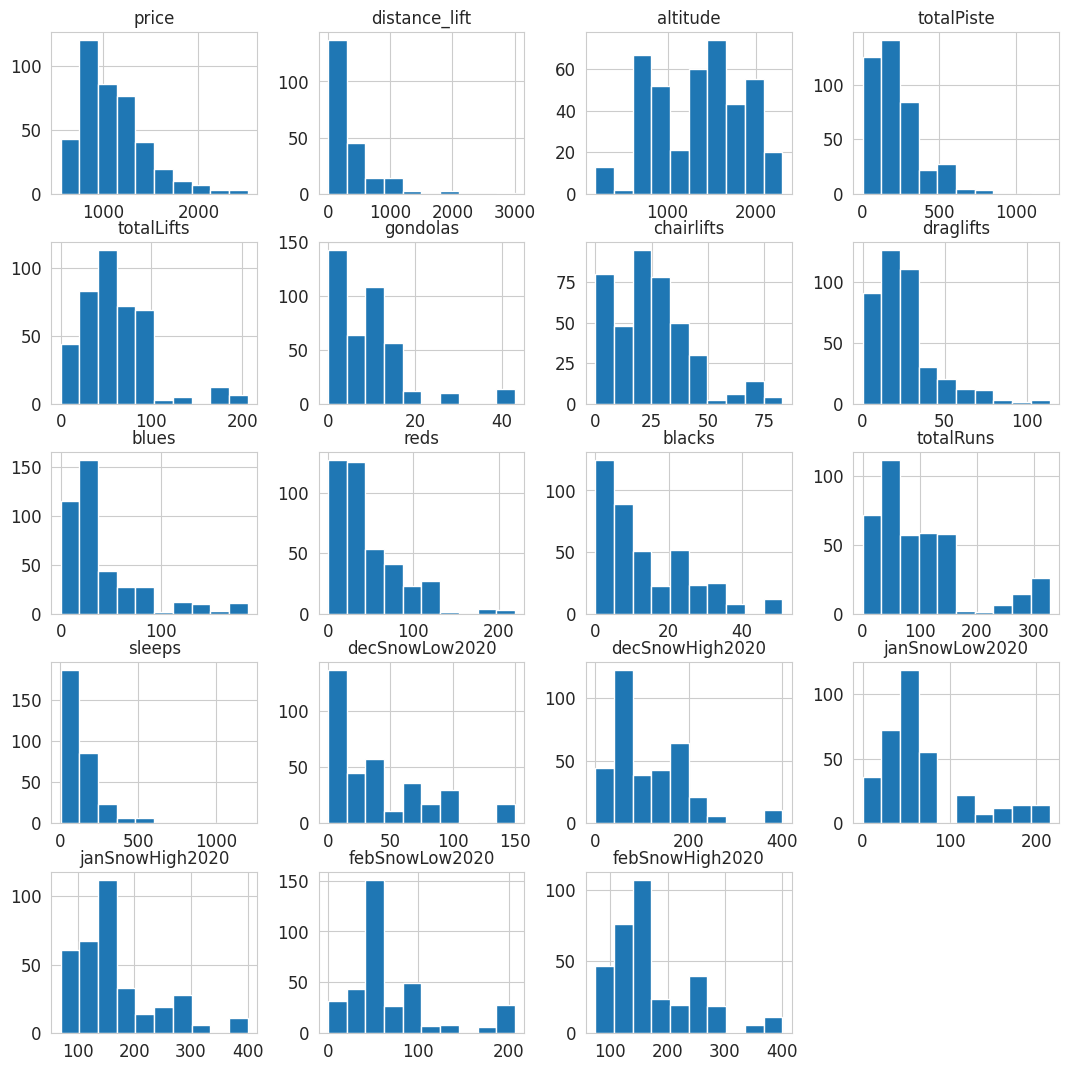

In [133]:
# Histograma
dataset.hist(figsize = (13,13))
plt.show()
     

O **Gráfico de Densidade**, ou **Density Plot**, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição dos atributos do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a **Box-Cox**, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.


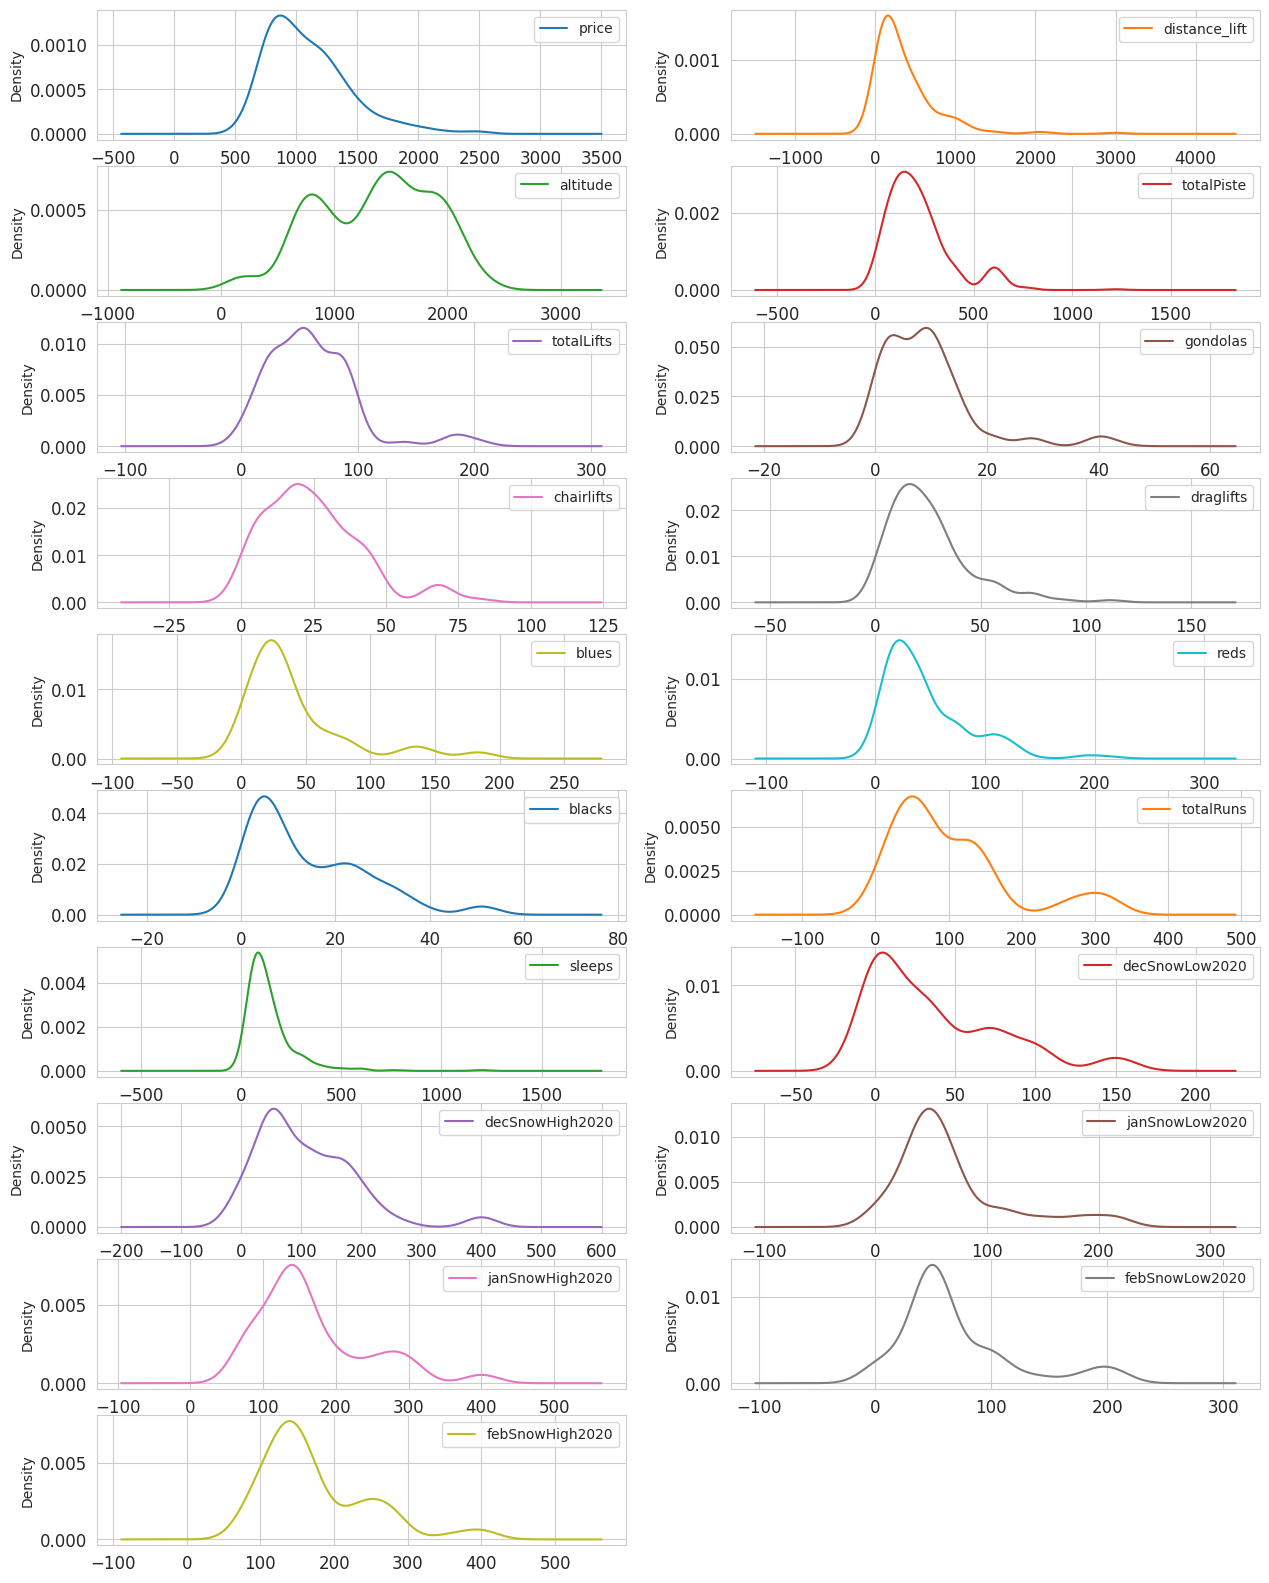

In [134]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (12,2), sharex = False, figsize = (15,24))
plt.show()

Vamos agora trabalhar com **boxplot**s. No boxblot, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.
OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

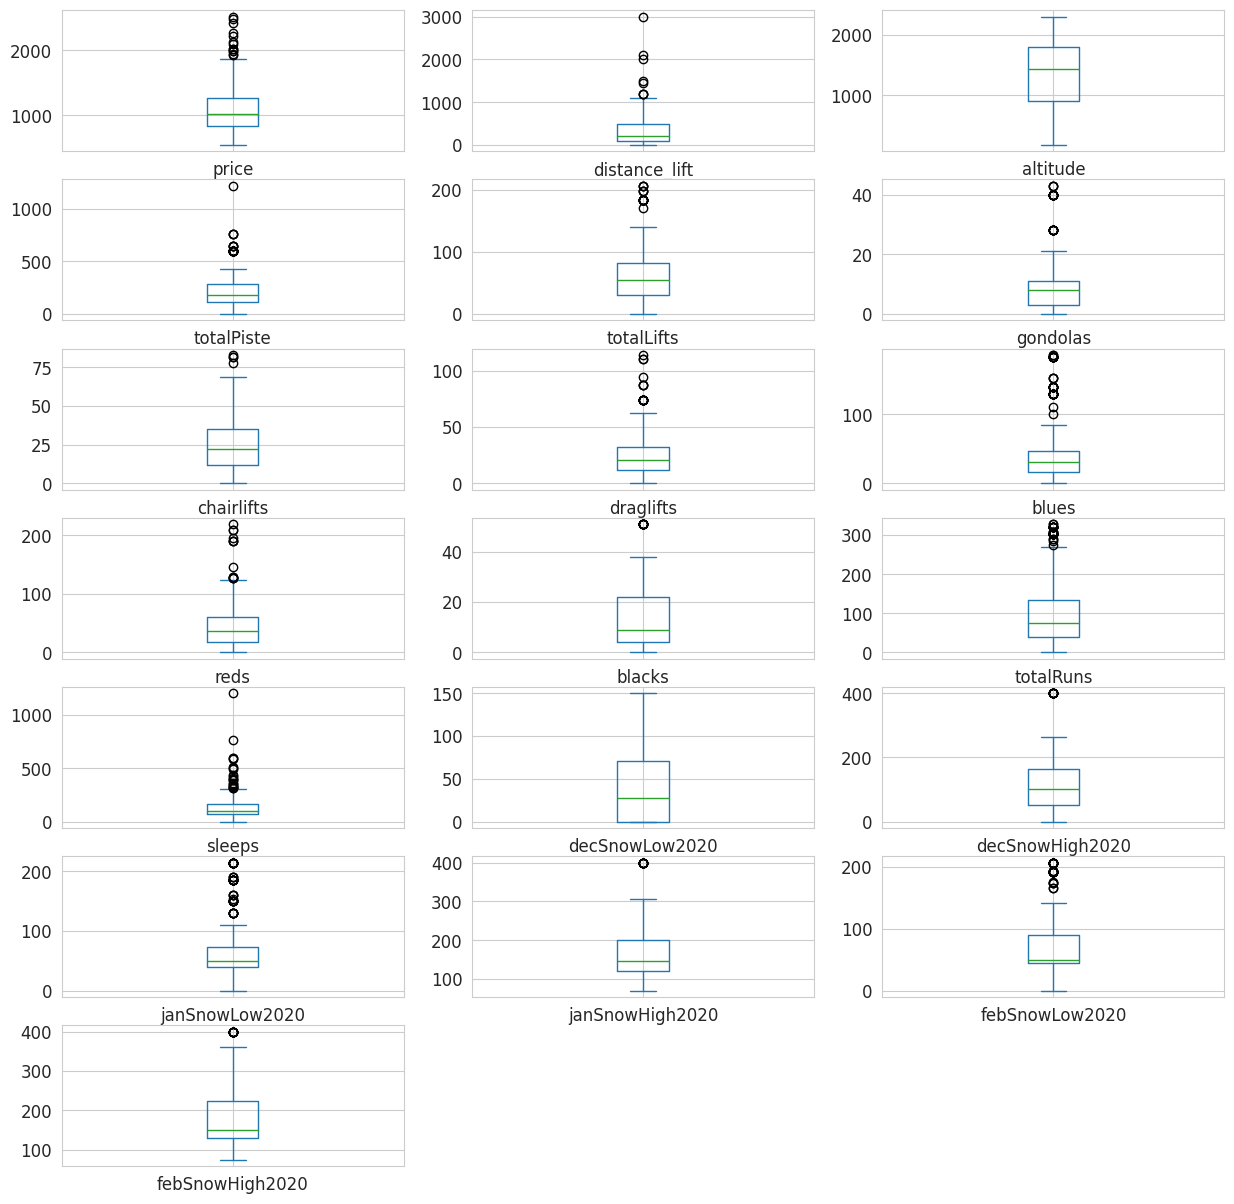

In [135]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (12 ,3), sharex = False, sharey = False, figsize = (15, 26))
plt.show()


Inspecionar recursos categóricos de baixa cardinalidade:

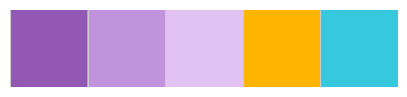

In [136]:
# Color Palette
custom_colors = ['#9357b4', '#c193dd', '#e1c2f2', '#ffb500', '#36c9dd']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

In [137]:
def barplot_features(df, feature, title, palette = custom_colors[2:]):
    '''Takes the numerical columns and plots the barplot.'''

    # We need to extract both the name of the category and the no. of appearences
    index = df[feature].value_counts().reset_index()["index"].values
    values = df[feature].value_counts().reset_index()[feature].values 

    plt.figure(figsize = (18, 3))
    sns.barplot(x = index, y = values, palette = palette)
    plt.title(title, fontsize=15)
    plt.show();

    del index, values
    gc.collect()

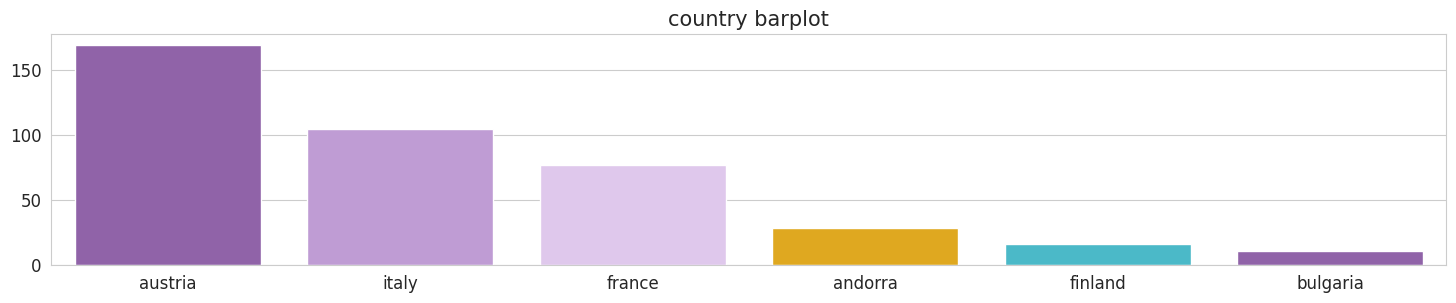

In [138]:
# Inspecionar cardionalidade mínima da coluna country (país)
categorical_for_bar = ['country']
for feature in categorical_for_bar:
      barplot_features(dataset, feature=feature, title = feature + " barplot", palette = custom_colors)

A **Áustria** é o país *mais frequentado* com **169 hotéis de esqui**, e a **Bulgária** é o *menos frequentado* com apenas **11 hotéis**.

###3.3.Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1 : há uma correlação negativa entre as variáveis,
Próximo de +1: há uma correlação positiva entre as variáveis.
0: não há correlação entre as variáveis.
OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A matriz de correlação exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

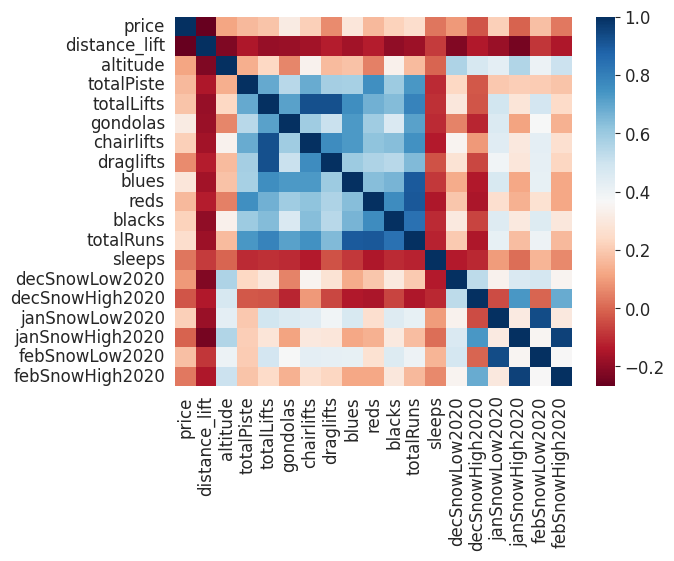

In [139]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=False, cmap='RdBu');

In [140]:
# Matriz de Correlação 
dataset.corr().style.background_gradient(cmap = "RdBu")


,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
price,1.000000,-0.267844,0.116842,0.160318,0.186678,0.315569,0.214678,0.066747,0.290029,0.159755,0.218314,0.252457,0.025091,0.092170,-0.030614,0.217236,-0.009872,0.176692,0.030211
distance_lift,-0.267844,1.000000,-0.224274,-0.144922,-0.183906,-0.182910,-0.167836,-0.131860,-0.164484,-0.132961,-0.197472,-0.174580,-0.077503,-0.219597,-0.142036,-0.181684,-0.240643,-0.086389,-0.145826
altitude,0.116842,-0.224274,1.000000,0.133424,0.232985,0.058555,0.341147,0.164306,0.182738,0.048489,0.333471,0.163390,-0.004735,0.560932,0.473660,0.428494,0.555938,0.404675,0.502624
totalPiste,0.160318,-0.144922,0.133424,1.000000,0.689280,0.543209,0.686207,0.582958,0.577665,0.755090,0.597221,0.733926,-0.106757,0.235328,-0.025735,0.193384,0.210414,0.203296,0.184300
totalLifts,0.186678,-0.183906,0.232985,0.689280,1.000000,0.708933,0.924841,0.921329,0.760188,0.670675,0.642521,0.791513,-0.094845,0.296194,-0.030658,0.489747,0.286375,0.480636,0.246884
gondolas,0.315569,-0.182910,0.058555,0.543209,0.708933,1.000000,0.590577,0.509618,0.728045,0.592585,0.462964,0.711888,-0.107355,0.053449,-0.117354,0.457030,0.108993,0.369632,0.142307
chairlifts,0.214678,-0.167836,0.341147,0.686207,0.924841,0.590577,1.000000,0.764448,0.729129,0.619891,0.634176,0.750748,-0.135216,0.348154,0.089634,0.441931,0.298146,0.429546,0.265786
draglifts,0.066747,-0.131860,0.164306,0.582958,0.921329,0.509618,0.764448,1.000000,0.596478,0.562016,0.542691,0.643721,-0.039469,0.276701,-0.057735,0.387324,0.290657,0.420594,0.228581
blues,0.290029,-0.164484,0.182738,0.577665,0.760188,0.728045,0.729129,0.596478,1.000000,0.636952,0.660272,0.897557,-0.082121,0.131287,-0.139117,0.468410,0.122471,0.416330,0.121489
reds,0.159755,-0.132961,0.048489,0.755090,0.670675,0.592585,0.619891,0.562016,0.636952,1.000000,0.766205,0.904543,-0.144621,0.191409,-0.149361,0.258620,0.140005,0.271805,0.120447


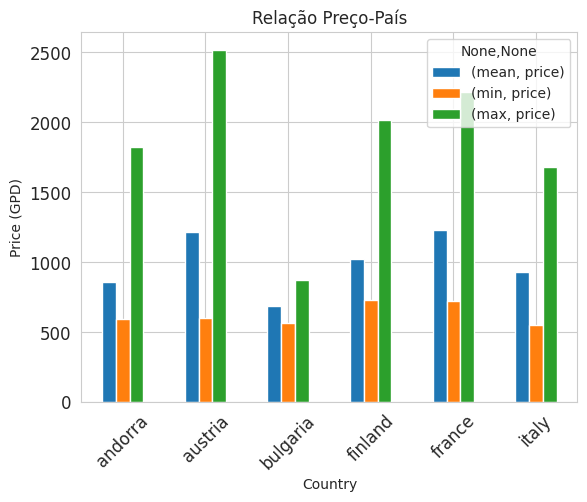

In [141]:
# Gráfico
grafico = dataset.pivot_table(values=["price"], index=["country"],aggfunc=["mean", "min","max"])
gra_real=grafico.plot.bar(rot=45, title="Relação Preço-País", xlabel="Country",ylabel="Price (GPD)")

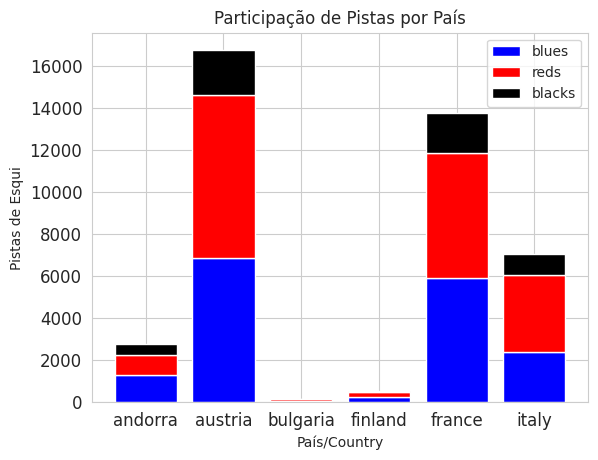

In [142]:
from matplotlib.colors import ListedColormap

# agrupar os dados por país e somar as colunas de cada cor de pista
dataset_pivot = dataset.groupby("country").sum()[["blues", "reds", "blacks"]]

# definir as cores das barras para cada cor de pista
cores_pistas = {"blues": "blue", "reds": "red", "blacks": "black"}

# criar o objeto AxesSubplot e plotar as barras empilhadas
fig, ax = plt.subplots()
for i, (pista, cor) in enumerate(cores_pistas.items()):
    ax.bar(dataset_pivot.index, dataset_pivot[pista], bottom=dataset_pivot.iloc[:, :i].sum(axis=1), color=cor)

# ajustar a legenda, título e eixos
ax.set_xlabel("País/Country")
ax.set_ylabel("Pistas de Esqui")
ax.legend(["blues", "reds", "blacks"])
ax.set_title("Participação de Pistas por País")

# definir uma paleta de cores personalizada para as barras empilhadas
colors_palette = ListedColormap(list(cores_pistas.values()))
plt.set_cmap(colors_palette)

# exibir o gráfico
plt.show()

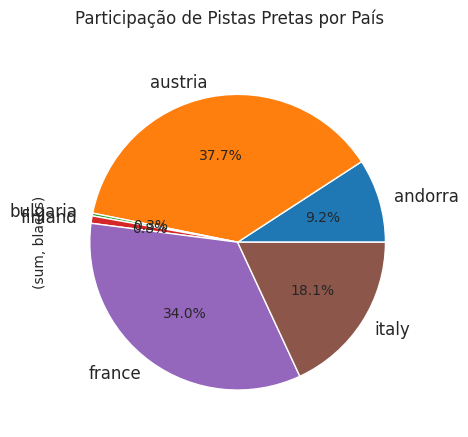

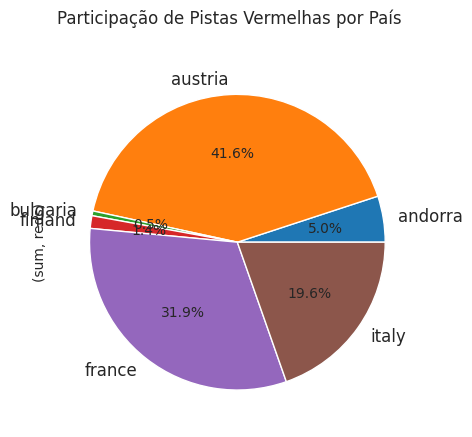

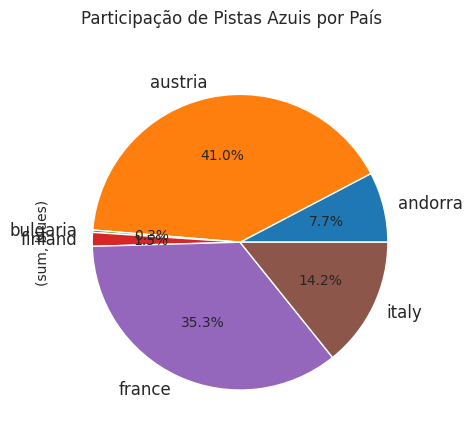

In [143]:
#
datasetNova1=dataset.pivot_table(values=["blacks"], index=["country"],aggfunc=["sum"])
graf_pizza=datasetNova1.plot.pie(rot=45, title="Participação de Pistas Pretas por País",subplots=True, autopct='%1.1f%%', legend=False)
datasetNova2=dataset.pivot_table(values=["reds"], index=["country"],aggfunc=["sum"])
graf_pizza=datasetNova2.plot.pie(rot=45, title="Participação de Pistas Vermelhas por País",subplots=True, autopct='%1.1f%%', legend=False)
datasetNova3=dataset.pivot_table(values=["blues"], index=["country"],aggfunc=["sum"])
graf_pizza=datasetNova3.plot.pie(rot=45, title="Participação de Pistas Azuis por País",subplots=True, autopct='%1.1f%%', legend=False)

##4.Pré-processamento de Dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

###4.1.Tratamento de Missings e Limpeza

Sabemos que o datset **ski_hotels** não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [144]:
# verificando nulls no dataset
dataset.isnull().sum()

country              0
resort               0
hotel                0
price                0
distance_lift      192
altitude             0
totalPiste           0
totalLifts           0
gondolas             0
chairlifts           0
draglifts            0
blues                0
reds                 0
blacks               0
totalRuns            0
sleeps              96
decSnowLow2020      56
decSnowHigh2020     56
janSnowLow2020      56
janSnowHigh2020     56
febSnowLow2020      56
febSnowHigh2020     56
dtype: int64

Verificamos através do comando acima a soma os valores nulos encontrados no dataset **ski_hotels**, como por exemplo na coluna "**distance_lift**" onde exsitem tem 192 valores nulos (47,17% do total).  

In [145]:
# Exibindo as dimensões do dataset
print(dataset.shape)

(407, 22)


In [146]:
# Salvando um NOVO dataset para tratamento de missings 

# Recuperando os nomes das colunas
col = list(dataset.columns)

# O novo dataset irá conter todas as colunas do dataset original
atributos = dataset[col[:]]

# Removendo a coluna 'distance_lift'e 'sleeps'
atributos.drop(['distance_lift', 'sleeps'], axis=1, inplace= True)

Foram removidas as colunas '**distance_lift** e '**sleeps**' que possuíam valores nulos em quantidade significativas no escopo do dataset e essas colunas não são tão representivas nesta análise.

In [147]:
# Exibindo as dimensões do dataset
print(atributos.shape)

(407, 20)


O dataset agora tem 2 colunas a menos que o dataset original.

In [148]:
# Verificando novamente nulls no dataset
atributos.isnull().sum()

country             0
resort              0
hotel               0
price               0
altitude            0
totalPiste          0
totalLifts          0
gondolas            0
chairlifts          0
draglifts           0
blues               0
reds                0
blacks              0
totalRuns           0
decSnowLow2020     56
decSnowHigh2020    56
janSnowLow2020     56
janSnowHigh2020    56
febSnowLow2020     56
febSnowHigh2020    56
dtype: int64

Verificamos que o dataset não possui mais as colunas "distance_lift" e "sleeps".e apenas a ultimas 6 colunas possuem valores 

In [149]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# exibindo as primeiras linhas
datasetSemMissings.head()
     

,country,resort,hotel,price,altitude,totalPiste,totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,italy,bardonecchia,residence-tabor,550,1312,140,23,0,9,14,17.0,24.0,1.0,42.0,70,170,60,200,47,177
1,italy,bardonecchia,residence-villa-frejus,561,1312,140,23,0,9,14,17.0,24.0,1.0,42.0,70,170,60,200,47,177
2,bulgaria,bansko,hotel-mura,566,935,70,24,1,7,16,5.0,8.0,1.0,14.0,0,70,5,75,5,77
3,bulgaria,borovets,hotel-samokov,574,1390,58,18,1,4,13,1.0,13.0,1.0,15.0,0,0,160,200,194,246
4,bulgaria,bansko,hotel-lion---bansko,596,935,70,24,1,7,16,5.0,8.0,1.0,14.0,0,70,5,75,5,77


###4.2.Transformações Numéricas

####4.2.1.Normalização

In [150]:
# Separando os valores dp dataset em componentes de input (x) e output (y)
x = dataset.values[:,0:8]
y = dataset.values[:,8]

In [151]:
# Exibindo os dados transformados

####4.2.2.Padronização

###4.3.Separação em conjunto de treino e conjunto de teste

Como boa prática de usar um conjunto de teste/conjunto de validação, uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. Para verificação de  quão boa foi a construção do modelo, e para nos dar uma idéia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino

In [152]:
test_size = 0.20
seed = 7

## Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:21]
y = array[:,21]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#   test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [153]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:19]
y_sm = array[:,19]
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
# X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#   test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação